In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
cd onedrive\Desktop

C:\Users\ROSE S JOSE\onedrive\Desktop


Getting the data

In [4]:
data_train=pd.read_csv('train.csv',index_col=0)
data_test=pd.read_csv('test.csv',index_col=0)

In [5]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
df_numeric_features= data_train.select_dtypes(include=[np.number])
df_numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
print('train shape',data_train.shape)
print('test shape',data_test.shape)
print('duplicated rows',data_train.duplicated().sum())
print('columns containing missing values',data_train.isnull().any().sum())

train shape (1460, 80)
test shape (1459, 79)
duplicated rows 0
columns containing missing values 19


In [9]:
data_test['SalePrice'] = np.nan
data_all = pd.concat([data_train,data_test],ignore_index=True)
print('merged shape ',data_all.shape)
print(data_all.info())

merged shape  (2919, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object


In [10]:
df_numeric_features= data_all.select_dtypes(include=[np.number])
df_numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df_categorical_features= data_all.select_dtypes(include=[np.object])
df_categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df_categorical_features.shape

(2919, 43)

In [13]:
df_numeric_features.shape

(2919, 37)

In [14]:
df_numeric_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
for i in df_categorical_features.columns:
    print(df_categorical_features[i].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, 

In [16]:
df_int_features=data_all.select_dtypes(include=['int64'])

In [17]:
df_int_features

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,4,7,1970,1970,546,546,0,1092,...,0,0,0,0,0,0,0,0,6,2006
2915,160,1894,4,5,1970,1970,546,546,0,1092,...,0,0,24,0,0,0,0,0,4,2006
2916,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,474,0,0,0,0,0,0,9,2006
2917,85,10441,5,5,1992,1992,970,0,0,970,...,0,80,32,0,0,0,0,700,7,2006


In [18]:
df_int_features.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [19]:
time_int = ['YrSold','YearBuilt','YearRemodAdd','MoSold']

In [20]:
#Get the numerical features from the dataset removing the column SalePrice

In [21]:
def get_num_features(df):
    num = list(df.select_dtypes(['int64','float64']).columns)
    try:
        num.remove('SalePrice')
    except:
        pass
    return num

In [22]:
num_train = data_train.select_dtypes(['int64','float64'])
object_train = data_train.select_dtypes('object')
num_train_corr = num_train.corr()

In [23]:
num_train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [24]:
num_all = data_all.select_dtypes(['int64','float64'])
object_all = data_all.select_dtypes('object')
num_all_corr = num_all.corr()

EDA for Numerical data

In [25]:
data_all.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [26]:
data_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


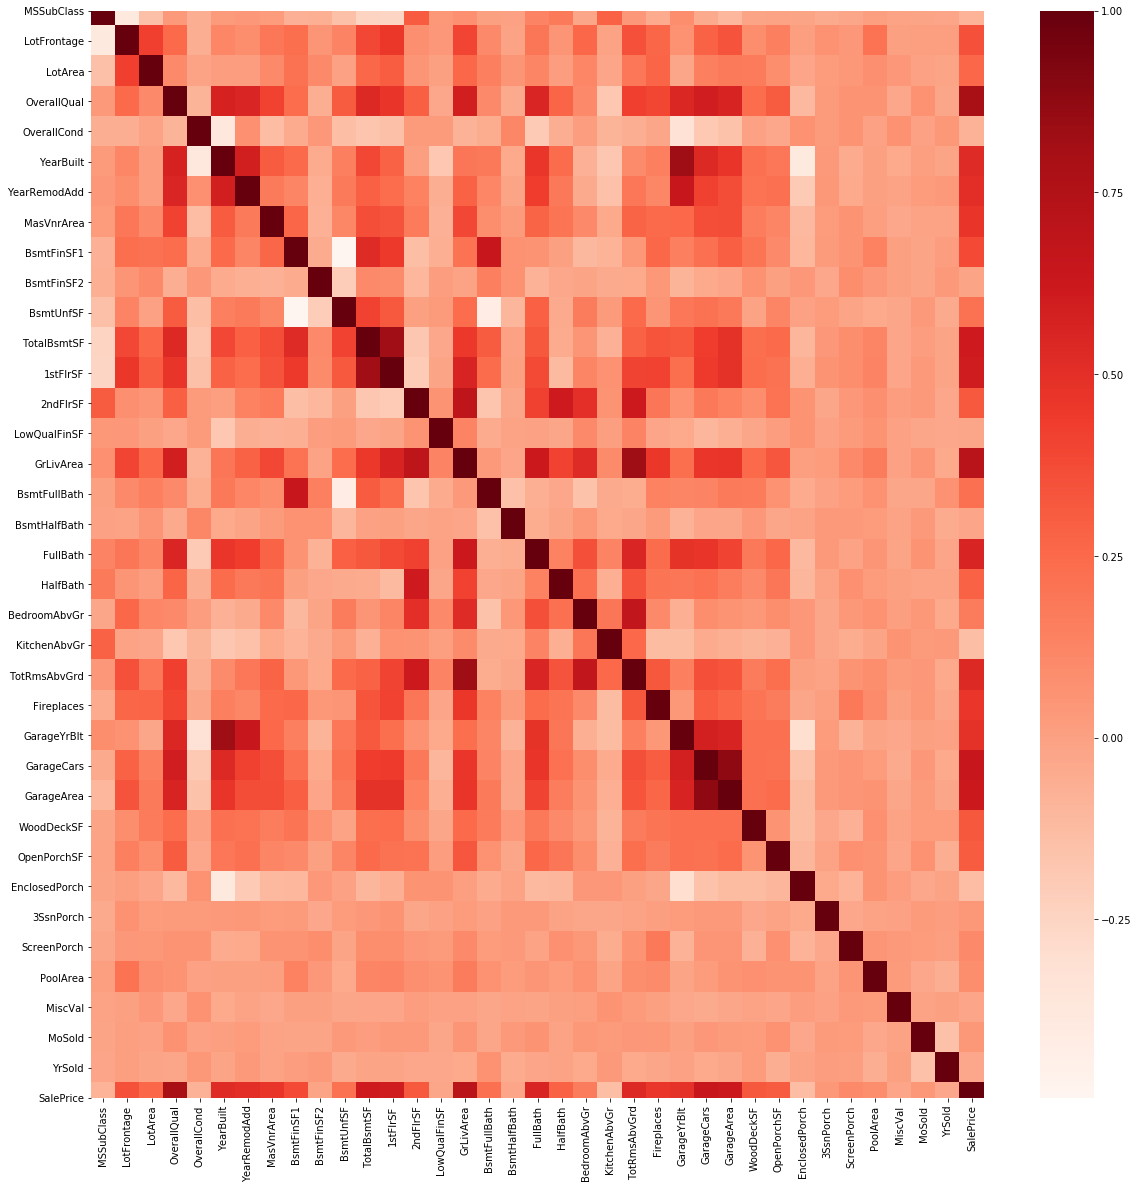

In [27]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data_train.corr(), cmap='Reds')

In [28]:
Correlation = pd.DataFrame(num_train.corr()['SalePrice'])
Correlation['Abs'] = np.abs(Correlation['SalePrice'])

In [29]:
Correlation = Correlation.sort_values(by='Abs',ascending=False)

In [30]:
Correlation #sorted the correlation in descending order of abs

,SalePrice,Abs
SalePrice,1.000000,1.000000
OverallQual,0.790982,0.790982
GrLivArea,0.708624,0.708624
GarageCars,0.640409,0.640409
GarageArea,0.623431,0.623431
TotalBsmtSF,0.613581,0.613581
1stFlrSF,0.605852,0.605852
FullBath,0.560664,0.560664
TotRmsAbvGrd,0.533723,0.533723
YearBuilt,0.522897,0.522897


In [31]:
#0.5 is taken as the threshold to find the important features
important_features_CC = list(Correlation[Correlation['Abs'] > 0.5].index)
important_features_CC.remove('SalePrice')
print(important_features_CC)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


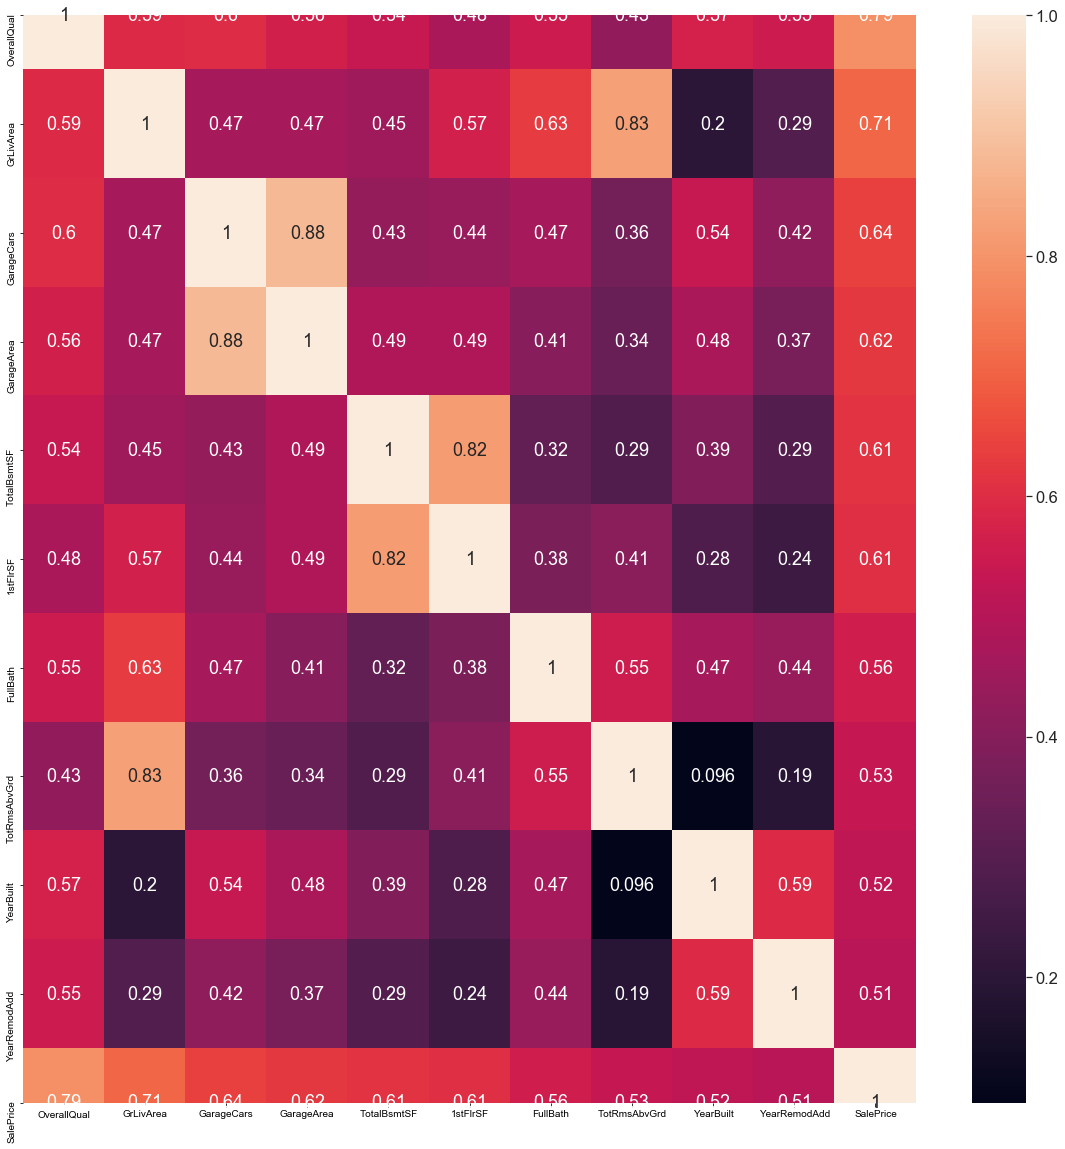

In [32]:
fig,ax=plt.subplots(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(data_train[important_features_CC+['SalePrice']].corr(),annot=True)

EDA for categorical data

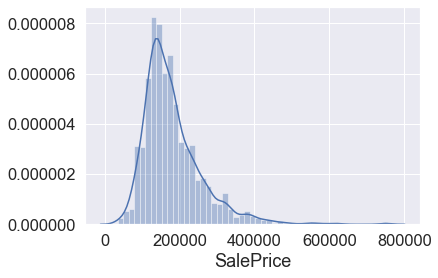

In [33]:
sns.distplot(data_train['SalePrice'])
plt.show()

Scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


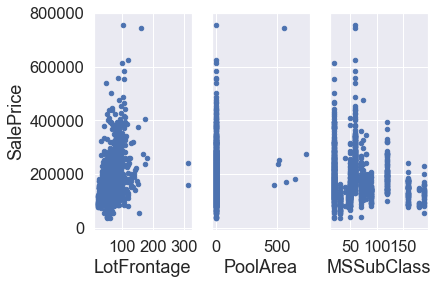

In [34]:
fig,axs=plt.subplots(1,3,sharey=True)
data_train.plot(kind='scatter',x='LotFrontage',y='SalePrice',ax=axs[0])
data_train.plot(kind='scatter',x='PoolArea',y='SalePrice',ax=axs[1])
data_train.plot(kind='scatter',x='MSSubClass',y='SalePrice',ax=axs[2])

In [35]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


scikit-learn

open source machine learning package

In [36]:
np.random.seed(123456)

In [37]:
nums=np.random.rand(len(data_all))

In [38]:
for i in df_categorical_features.columns:
    #len(pd.unique(df['height']))
    if len(pd.unique(df_categorical_features[i])) == 2:
        print(i, len(pd.unique(df_categorical_features[i])))
        ms_dummies=pd.get_dummies(data_all[i],prefix=i).iloc[:,1:]
        data_all=pd.concat([data_all,ms_dummies],axis=1)
        del data_all[i]
   # print(df_categorical_features[i].value_counts())

Street 2
CentralAir 2


In [39]:
data_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,CentralAir_Y
0,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,1
1,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,1
2,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,1
3,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,1
4,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,1


In [40]:
data_all.shape

(2919, 80)

In [41]:
#Change Ordinal features into numbers
data_all['ExterQual'] = data_all['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data_all['ExterCond'] = data_all['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data_all['BsmtQual'] = data_all['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data_all['BsmtCond'] = data_all['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data_all['BsmtExposure'] = data_all['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
data_all['HeatingQC'] = data_all['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data_all['KitchenQual'] = data_all['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data_all['FireplaceQu'] = data_all['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data_all['GarageFinish'] = data_all['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0})
data_all['GarageQual'] = data_all['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data_all['GarageCond'] = data_all['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data_all['PavedDrive'] = data_all['PavedDrive'].replace({'Y':3,'P':2,'N':1})
data_all['PoolQC'] = data_all['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})
data_all['Fence'] = data_all['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0})

In [42]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [43]:
data_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,CentralAir_Y
0,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,1
1,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,1
2,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,1
3,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,1
4,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,1


In [44]:
data_all.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
data_all.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Alley            2721
                 ... 
SaleType            1
SaleCondition       0
SalePrice        1459
Street_Pave         0
CentralAir_Y        0
Length: 80, dtype: int64

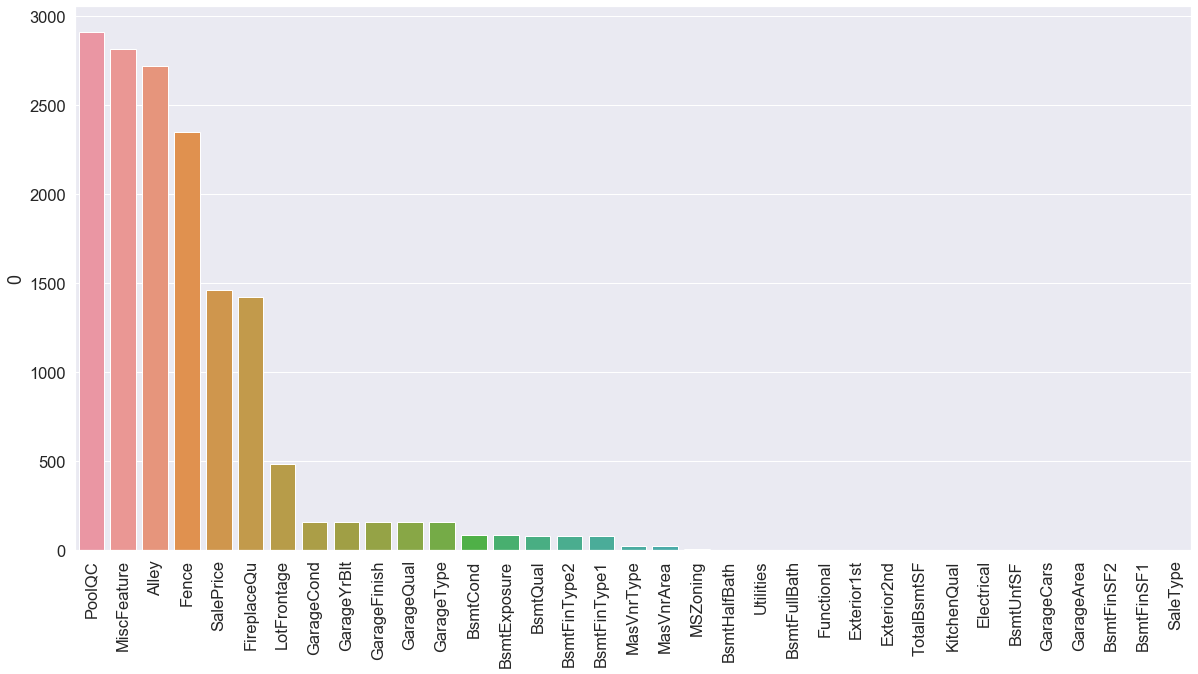

In [47]:
missing_counts = pd.DataFrame(data_all.isnull().sum().sort_values(ascending=False))
plt.figure(figsize=(20,10))
missing_columns = missing_counts[missing_counts.iloc[:,0]>0]
sns.barplot(x=missing_columns.index,y=missing_columns.iloc[:,0])
plt.xticks(rotation=90)
plt.show()

In [48]:
#delete features with more than 1000 missing values
drop_col = list(missing_counts[missing_counts.iloc[:,0] > 1000].index)
drop_col.remove('SalePrice')

In [49]:
drop_col

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [50]:
try:
    data_all = data_all.drop(columns=drop_col,axis=0)
    missing_columns = missing_columns.drop(index=drop_col,axis=1)
except:
    pass

In [51]:
print(data_all[missing_columns.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 30 columns):
SalePrice       1460 non-null float64
LotFrontage     2433 non-null float64
GarageCond      2760 non-null object
GarageYrBlt     2760 non-null float64
GarageFinish    2760 non-null object
GarageQual      2760 non-null object
GarageType      2762 non-null object
BsmtCond        2837 non-null object
BsmtExposure    2837 non-null object
BsmtQual        2838 non-null object
BsmtFinType2    2839 non-null object
BsmtFinType1    2840 non-null object
MasVnrType      2895 non-null object
MasVnrArea      2896 non-null float64
MSZoning        2915 non-null object
BsmtHalfBath    2917 non-null float64
Utilities       2917 non-null object
BsmtFullBath    2917 non-null float64
Functional      2917 non-null object
Exterior1st     2918 non-null object
Exterior2nd     2918 non-null object
TotalBsmtSF     2918 non-null float64
KitchenQual     2918 non-null object
Electrical      2918 non-null objec

In [52]:
#Since some numerical features are ordinal ones
#it would be more reasonable to use median as the default values
#as for categorical ones, we opt for the mode category
missing_object = data_all[missing_columns.index].select_dtypes('object').columns
print('missing object',len(missing_object))
missing_num = data_all[missing_columns.index].select_dtypes(['int64','float64']).columns
print('missing num ',len(missing_num))

missing object 18
missing num  12


In [53]:
#data['LotFrontage']=pd.DataFrame(data['LotFrontage'])
df_nu=data_all.select_dtypes(include=['number'])
df_nu=df_nu.loc[:,df_nu.isnull().any()]
cols_to_drop=df_nu.columns[df_nu.isnull().mean()<=0.30]
for i in df_nu:
    data_all[i]=data_all.fillna(df_nu.median()).drop(cols_to_drop,axis=1)

In [54]:
for j in missing_object:
    data_all[j] = data_all[j].fillna(data_all[j].mode()[0])
print(data_all.isnull().any().sum())

0


In [55]:
data_all.shape

(2919, 75)

In [56]:
data_all.loc[[8],['LotFrontage']]

,LotFrontage
8,50


In [57]:
data_all.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [58]:
#build some new features based on our findings in EDA or domain
from scipy import stats
stats.pearsonr(data_all['ExterQual'],data_all['ExterCond'])
#those two are independent variables
#suggest that these two may have interaction effects
data_all['OverallValue'] = data_all['OverallQual'] * data_all['OverallCond']
data_all['ExterValue'] = data_all['ExterQual'] * data_all['ExterCond']
data_all['BsmtQual'] = data_all['BsmtQual'] * data_all['BsmtCond']
data_all['GarageValue'] = data_all['GarageQual'] * data_all['GarageCond']
data_all['TotalArea'] = data_all['TotalBsmtSF'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']

In [59]:
#print(data_all.groupby('MSSubClass')['SalePrice'].mean())
#print(data_all.groupby('Exterior1st')['SalePrice'].mean())
#print(data_all.groupby('Exterior2nd')['SalePrice'].mean())
MSSubClass_Stories = {'20':1,'30':1,'40':1,'45':1.5,'50':1.5,'60':2,'70':2,'75':2.5,'120':1,'150':1.5,'160':2}
MSSubClass_Ages = {'20':1,'30':0,'40':0.5,'45':0.5,'50':0.5,'60':1,'70':0,'75':0.5,'90':0.5,'120':1,'150':0.5,'160':1}
MSSubClass_Other = []
def get_MSSubClass_Stories(data):
    if str(data) in MSSubClass_Stories.keys():
        return MSSubClass_Stories[str(data)]
    else:
        return 2
def get_MSSubClass_Ages(data):
    if str(data) in MSSubClass_Ages.keys():
        return MSSubClass_Ages[str(data)]
    else:
        return 0.5


data_all['Stories'] = data_all['MSSubClass'].apply(get_MSSubClass_Stories)
data_all['Ages'] = data_all['MSSubClass'].apply(get_MSSubClass_Ages)

In [60]:
#Get rid of non-related features
low_correl_col_num = list(Correlation[Correlation['Abs'] < 0.1].index)
try:
    low_correl_col_num.remove('MoSold')
except:
    pass
low_correl_col_cat = ['LotShape','Utilities','LotConfig','LandSlope','RoofStyle']
#Possible Interaction
data_all = data_all.drop(columns=low_correl_col_num+low_correl_col_cat+['Neighborhood','YrSold'])

In [61]:
data_all.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'LotFrontage', 'LandContour', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'Electrical', 'BsmtFullBath', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SaleType', 'SaleCondition', 'SalePrice',
       'ExterValue', 'TotalArea'],
      dtype='object')

In [63]:
data_all.head()

,MSZoning,LotFrontage,LotArea,LandContour,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,...,SaleCondition,SalePrice,Street_Pave,CentralAir_Y,OverallValue,ExterValue,GarageValue,TotalArea,Stories,Ages
0,RL,60,8450,Lvl,Norm,Norm,1Fam,2Story,7,2003,...,Normal,60,1,1,35,12,9,1770,2.0,1.0
1,RL,20,9600,Lvl,Feedr,Norm,1Fam,1Story,6,1976,...,Normal,20,1,1,48,9,9,1282,1.0,1.0
2,RL,60,11250,Lvl,Norm,Norm,1Fam,2Story,7,2001,...,Normal,60,1,1,35,12,9,1846,2.0,1.0
3,RL,70,9550,Lvl,Norm,Norm,1Fam,2Story,7,1915,...,Abnorml,70,1,1,35,9,9,1787,2.0,0.0
4,RL,60,14260,Lvl,Norm,Norm,1Fam,2Story,8,2000,...,Normal,60,1,1,40,12,9,2258,2.0,1.0


In [64]:
data_all[['OverallValue','ExterValue','BsmtQual','GarageValue','TotalArea','SalePrice','GarageCars', 'GarageArea','TotalBsmtSF','MasVnrArea','ExterQual','BsmtUnfSF','BsmtFullBath']] = data_all[['OverallValue','ExterValue','BsmtQual','GarageValue','TotalArea','SalePrice','GarageCars', 'GarageArea','TotalBsmtSF','MasVnrArea','ExterQual','BsmtUnfSF','BsmtFullBath']].apply(pd.to_numeric)

In [65]:
for i in data_all.select_dtypes(include=[np.object]).columns:
    ms_dummies=pd.get_dummies(data_all[i],prefix=i).iloc[:,1:]
    data_all=pd.concat([data_all,ms_dummies],axis=1)

In [66]:
data_all.head()

,MSZoning,LotFrontage,LotArea,LandContour,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,60,8450,Lvl,Norm,Norm,1Fam,2Story,7,2003,...,0,0,0,0,1,0,0,0,1,0
1,RL,20,9600,Lvl,Feedr,Norm,1Fam,1Story,6,1976,...,0,0,0,0,1,0,0,0,1,0
2,RL,60,11250,Lvl,Norm,Norm,1Fam,2Story,7,2001,...,0,0,0,0,1,0,0,0,1,0
3,RL,70,9550,Lvl,Norm,Norm,1Fam,2Story,7,1915,...,0,0,0,0,1,0,0,0,0,0
4,RL,60,14260,Lvl,Norm,Norm,1Fam,2Story,8,2000,...,0,0,0,0,1,0,0,0,1,0


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
data_all.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,6.089072,1971.312778,1984.264474,57.137718,3.396711,3.085646,10.733470,3.002741,1.651936,...,0.003083,0.002741,0.081877,0.002398,0.865365,0.004111,0.008222,0.015759,0.822885,0.083933
std,7886.996359,1.409947,30.291442,20.894344,42.517628,0.580293,0.372361,2.491978,0.290339,1.039713,...,0.055451,0.052289,0.274225,0.048920,0.341392,0.063996,0.090317,0.124562,0.381832,0.277335
min,1300.000000,1.000000,1872.000000,1950.000000,20.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,5.000000,1953.500000,1965.000000,20.000000,3.000000,3.000000,9.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9453.000000,6.000000,1973.000000,1993.000000,50.000000,3.000000,3.000000,12.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11570.000000,7.000000,2001.000000,2004.000000,70.000000,4.000000,3.000000,12.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,215245.000000,10.000000,2010.000000,2010.000000,190.000000,5.000000,5.000000,20.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
data_all.isnull().sum()

MSZoning                 0
LotFrontage              0
LotArea                  0
LandContour              0
Condition1               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 231, dtype: int64

In [70]:
print('columns containing missing values',data_all.isnull().any().sum())

columns containing missing values 0


In [71]:
data_all

,MSZoning,LotFrontage,LotArea,LandContour,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,60,8450,Lvl,Norm,Norm,1Fam,2Story,7,2003,...,0,0,0,0,1,0,0,0,1,0
1,RL,20,9600,Lvl,Feedr,Norm,1Fam,1Story,6,1976,...,0,0,0,0,1,0,0,0,1,0
2,RL,60,11250,Lvl,Norm,Norm,1Fam,2Story,7,2001,...,0,0,0,0,1,0,0,0,1,0
3,RL,70,9550,Lvl,Norm,Norm,1Fam,2Story,7,1915,...,0,0,0,0,1,0,0,0,0,0
4,RL,60,14260,Lvl,Norm,Norm,1Fam,2Story,8,2000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,160,1936,Lvl,Norm,Norm,Twnhs,2Story,4,1970,...,0,0,0,0,1,0,0,0,1,0
2915,RM,160,1894,Lvl,Norm,Norm,TwnhsE,2Story,4,1970,...,0,0,0,0,1,0,0,0,0,0
2916,RL,20,20000,Lvl,Norm,Norm,1Fam,1Story,5,1960,...,0,0,0,0,1,0,0,0,0,0
2917,RL,85,10441,Lvl,Norm,Norm,1Fam,SFoyer,5,1992,...,0,0,0,0,1,0,0,0,1,0


In [72]:
print(data_all[important_features_CC].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 10 columns):
OverallQual     2919 non-null int64
GrLivArea       2919 non-null int64
GarageCars      2919 non-null int64
GarageArea      2919 non-null int64
TotalBsmtSF     2919 non-null int64
1stFlrSF        2919 non-null int64
FullBath        2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
YearBuilt       2919 non-null int64
YearRemodAdd    2919 non-null int64
dtypes: int64(10)
memory usage: 228.1 KB
None


In [73]:
numeric_features= data_all.select_dtypes(include=[np.number])
numeric_features.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=209)

In [74]:
y = data_all.loc[:,['SalePrice']]

In [75]:
data_all.drop('SalePrice',axis=1,inplace=True)

In [76]:
X = data_all.iloc[:,1:]
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape


(2189, 229)

In [77]:
X_test.columns

Index(['LotFrontage', 'LotArea', 'LandContour', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [78]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'LandContour', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [79]:
y_train.columns

Index(['SalePrice'], dtype='object')

In [80]:
X_train.select_dtypes(include=[np.number]).columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=208)

In [114]:
feature_cols=X_train.select_dtypes(include=[np.number]).columns
'''feature_cols=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Fireplaces',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'Street_Pave',
       'CentralAir_Y', 'OverallValue', 'GarageValue', 'Stories', 'Ages']'''
X=X_train[feature_cols]
#X_test=data_test
#X=numeric_features
#y=data_all.SalePrice
lm=LinearRegression()
lm.fit(X,y_train)
print(lm.intercept_)
print(lm.coef_)
#y_true=data_test.SalePrice
#y_pred=lm.predict(X_test)

[-0.00014429]
[[ 7.42188642e-17 -2.32591724e-14 -1.70696790e-15  2.49800181e-15
   1.57893460e-01  1.18238752e-14 -6.45317133e-15 -7.77242853e-15
   5.83387505e-14 -7.96324812e-15  1.57893460e-01  1.57893460e-01
   3.09864981e-16 -5.26311532e-02 -5.26311532e-02  8.32667268e-17
   1.57893460e-01 -2.97292979e-15 -6.00051692e-16 -4.78675259e-16
  -8.50297073e-15 -1.09504419e-17  3.42716307e-16  4.50052322e-16
   4.68700599e-16  1.57893460e-01  1.57893460e-01 -3.13285639e-15
  -4.64667028e-16 -4.50214952e-16 -1.87350135e-16  6.93889390e-18
   1.47451495e-17  3.90312782e-17  8.33751471e-17  9.13169280e-17
   1.59194760e-16  6.20163643e-16 -8.72782749e-16  5.95606463e-16
   5.26311532e-02  4.76397892e-04 -1.70337604e-04  1.08679748e-15
  -6.15488021e-16 -4.89354651e-16 -8.60314424e-17 -2.98171306e-05
   2.55345406e-05 -4.03840727e-05 -2.69030374e-05 -5.09510148e-05
  -8.07681454e-05 -1.18297158e-04 -2.54164742e-05 -1.19354389e-05
   1.15919730e-06  2.69620706e-04  2.42717669e-04  2.18669691e

In [120]:
X_test1=X_test[feature_cols]
y_true=data_test.SalePrice
y_pred=lm.predict(X_test1)

In [83]:
print(zip(feature_cols,lm.coef_))

In [84]:
from sklearn import metrics

In [85]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [121]:
print_evaluate(y_test,y_pred)

MAE: 2.659133187616172e-13
MSE: 1.934519145672214e-25
RMSE: 4.398316889074972e-13
R2 Square 1.0
__________________________________
